# Regresion logistica para predicciones bancarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../datasets/bank/bank.csv", sep=";")

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
data.shape

(4119, 21)

In [5]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [6]:
data["y"] = (data["y"]=="yes").astype(int)

In [7]:
data["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [8]:
data["education"] = np.where(data["education"]=="basic.4y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.6y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.9y", "Basic", data["education"])

data["education"] = np.where(data["education"]=="high.school", "High School", data["education"])
data["education"] = np.where(data["education"]=="professional.course", "Professional Course", data["education"])
data["education"] = np.where(data["education"]=="university.degree", "University Degree", data["education"])

data["education"] = np.where(data["education"]=="illiterate", "Illiterate", data["education"])
data["education"] = np.where(data["education"]=="unknown", "Unknown", data["education"])





In [9]:
data["education"].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

In [10]:
data["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [11]:
data.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [12]:
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


Text(0, 0.5, 'Frecuencia de compra del producto')

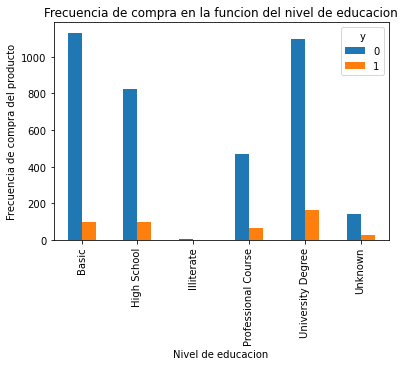

In [13]:
%matplotlib inline
pd.crosstab(data.education, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en la funcion del nivel de educacion")
plt.xlabel("Nivel de educacion")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Proporsion de clientes')

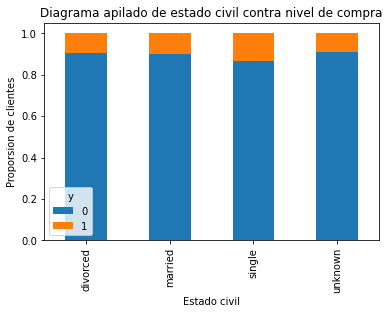

In [14]:
table = pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis= 0).plot(kind="bar", stacked=True)
plt.title("Diagrama apilado de estado civil contra nivel de compra")
plt.xlabel("Estado civil")
plt.ylabel("Proporsion de clientes")

Text(0, 0.5, 'Frecuencia de compra del producto')

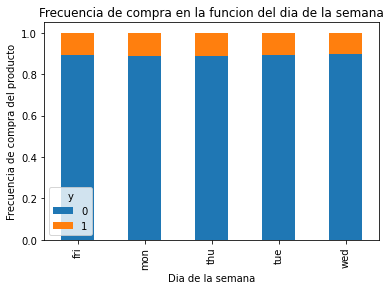

In [15]:
%matplotlib inline
table = pd.crosstab(data.day_of_week, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Frecuencia de compra en la funcion del dia de la semana")
plt.xlabel("Dia de la semana")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Frecuencia de compra del producto')

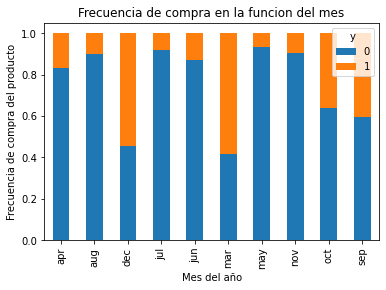

In [16]:
%matplotlib inline
table = pd.crosstab(data.month, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Frecuencia de compra en la funcion del mes")
plt.xlabel("Mes del año")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Frecuencia de compra del producto')

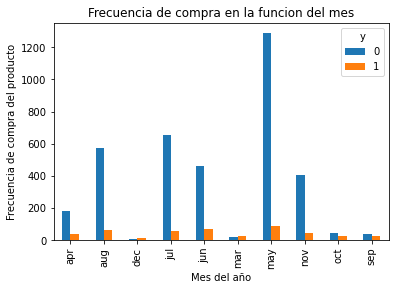

In [17]:
%matplotlib inline
table = pd.crosstab(data.month, data.y)
table.plot(kind="bar", stacked=False)
plt.title("Frecuencia de compra en la funcion del mes")
plt.xlabel("Mes del año")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Clientes')

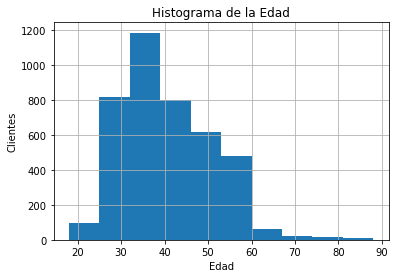

In [18]:
%matplotlib inline
data.age.hist()
plt.title("Histograma de la Edad")
plt.xlabel("Edad")
plt.ylabel("Clientes")

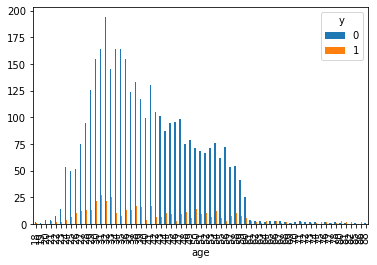

In [19]:
pd.crosstab(data.age, data.y).plot(kind="bar")

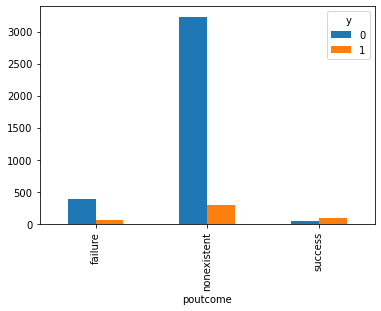

In [20]:
pd.crosstab(data.poutcome, data.y).plot(kind="bar")

## Conversion de las variables categoricas a dummies

In [21]:
categories = ["job", "marital", "education","housing", "loan", "contact", "month", "day_of_week", 
             "poutcome"]

In [22]:
for categorie in categories:
    cat_list = "cat_" + categorie
    cat_dummies = pd.get_dummies(data[categorie], prefix = categorie)
    data_new = data.join(cat_dummies)
    data = data_new

In [23]:
data_vars = data.columns.values.tolist()

In [24]:
to_keep = [v for v in data_vars if v not in categories]
to_keep = [v for v in to_keep if v not in ["default"]]

In [25]:
bank_data = data[to_keep]
bank_data.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Illiterate', 'education_Professional Course',
       'education_University Degree', 'education_Unknown', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'd

In [26]:
bank_data_vars = bank_data.columns.values.tolist()
Y = ['y']
X = [v for v in bank_data_vars if v not in Y]

### Seleccion de rasgos para el modelo



In [27]:
n = 12

In [28]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [29]:
lr = LogisticRegression(solver='liblinear')

In [30]:
rfe = RFE(lr,n)

In [31]:
rfe = rfe.fit(bank_data[X], bank_data[Y].values.ravel())

In [32]:
print(rfe.support_)

[False False False False  True False False False  True False False False
  True False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True  True  True  True  True False
  True False False False False False False  True False  True]


In [33]:
print(rfe.ranking_)

[34 38 18 42  1 14 27 25  1 37 22  3  1 35  2 39  1  5 30 33 12 45 19 40
 31 47 26 13 46 21 32  8 20  6 10 15  9 23 16  4 43 24  1  1  1  1  1 17
  1 44 36 28 41 29 11  1  7  1]


In [34]:
z = zip(bank_data_vars, rfe.support_, rfe.ranking_)

In [35]:
list(z)

[('age', False, 34),
 ('duration', False, 38),
 ('campaign', False, 18),
 ('pdays', False, 42),
 ('previous', True, 1),
 ('emp.var.rate', False, 14),
 ('cons.price.idx', False, 27),
 ('cons.conf.idx', False, 25),
 ('euribor3m', True, 1),
 ('nr.employed', False, 37),
 ('y', False, 22),
 ('job_admin.', False, 3),
 ('job_blue-collar', True, 1),
 ('job_entrepreneur', False, 35),
 ('job_housemaid', False, 2),
 ('job_management', False, 39),
 ('job_retired', True, 1),
 ('job_self-employed', False, 5),
 ('job_services', False, 30),
 ('job_student', False, 33),
 ('job_technician', False, 12),
 ('job_unemployed', False, 45),
 ('job_unknown', False, 19),
 ('marital_divorced', False, 40),
 ('marital_married', False, 31),
 ('marital_single', False, 47),
 ('marital_unknown', False, 26),
 ('education_Basic', False, 13),
 ('education_High School', False, 46),
 ('education_Illiterate', False, 21),
 ('education_Professional Course', False, 32),
 ('education_University Degree', False, 8),
 ('education_U

In [36]:
col = ['previous',"euribor3m","job_blue-collar", "job_retired","month_aug"]

In [37]:
cols = []
for i in list(zip(bank_data_vars, rfe.support_, rfe.ranking_)):
    if(i[1]):
        cols.append(i[0])

In [38]:
col

['previous', 'euribor3m', 'job_blue-collar', 'job_retired', 'month_aug']

In [39]:
X = bank_data[cols]
Y = bank_data["y"]

In [40]:
## Implementaciob del modelo en Python con statsmodel.api

In [41]:
import statsmodels.api as sm

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [42]:
logit_model = sm.Logit(Y,X)

In [43]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.291770
         Iterations 7


In [44]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.155     
Dependent Variable:   y                 AIC:               2427.6025 
Date:                 2020-05-15 11:06  BIC:               2503.4828 
No. Observations:     4119              Log-Likelihood:    -1201.8   
Df Model:             11                LL-Null:           -1422.9   
Df Residuals:         4107              LLR p-value:       6.4492e-88
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
previous             -0.1229   0.0700  -1.7545 0.0793 -0.2601  0.0144
euribor3m            -0.6049   0.0383 -15.7882 0.0000 -0.6800 -0.5298
job_blue-collar      -0.5032   0.1519  -3.3136 0.0009 -0.8009 -0.2056
job_retired           0.2235   0.2191   1.0205 0.3075 -0.2058  0.6529
month_aug             0.6048   0.1759   3.4374 0.0006  0.2600  0.9497
month_dec             1.1358   0.4493   2.5281 0.0115  0.2552  2.0163
month_jul             1.0327   0.1910   5.4071 0.0000  0.6584  1.4070
month_jun             1.0775   0.1752   6.1493 0.0000  0.7341  1.4210
month_mar             1.6448   0.3139   5.2407 0.0000  1.0297  2.2600
month_nov             0.3828   0.1950   1.9634 0.0496  0.0007  0.7649
day_of_week_wed      -0.0649   0.1391  -0.4665 0.6409 -0.3375  0.2077
poutcome_nonexistent -0.7753   0.1221  -6.3492 0.0000 -1.0147 -0.5360
=====================================================================

"""

### Implementacion del modelo en Python con scikit-learn

In [45]:
from sklearn import linear_model

In [46]:
logic_model = linear_model.LogisticRegression()

In [47]:
logic_model.fit(X,Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
logic_model.score(X,Y)

0.8963340616654528

In [49]:
Y.mean()

0.10949259529011895

In [50]:
# Eficacia
1 - Y.mean()

0.8905074047098811

In [51]:
pd.DataFrame(zip(X.columns, np.transpose(logic_model.coef_)))

,0,1
0,previous,[0.5076571353198053]
1,euribor3m,[-0.5464961347664662]
2,job_blue-collar,[-0.35915536229108297]
3,job_retired,[0.35603838875140903]
4,month_aug,[0.6253983085585507]
5,month_dec,[1.1822172985961166]
6,month_jul,[0.9622633626457109]
7,month_jun,[1.0543179247787158]
8,month_mar,[1.6306366297752934]
9,month_nov,[0.4519576817630052]


### Validacion del modelo logistico

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state=0)

In [54]:
lm = linear_model.LogisticRegression()
lm.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
probs = lm.predict_proba(X_test)

In [60]:
formula = r'Y_p=\begin{cases}0& si\ p\leq0.5\\1&si\ p >0.5\end{cases}'
display(Math(formula))

<IPython.core.display.Math object>

In [56]:
from IPython.display import display, Math, Latex

array([[0.95462912, 0.04537088],
       [0.83762689, 0.16237311],
       [0.93244632, 0.06755368],
       ...,
       [0.65044409, 0.34955591],
       [0.97383524, 0.02616476],
       [0.57021896, 0.42978104]])

In [57]:
prediction = lm.predict(X_test)

In [62]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df["prediccion"] = np.where(prob_df[0] >threshold,1,0)
prob_df.head()

,0,prediccion
0,0.045371,0
1,0.162373,1
2,0.067554,0
3,0.062144,0
4,0.041582,0


In [64]:
pd.crosstab(prob_df.prediccion, columns="count")

col_0,count
prediccion,
0,846
1,390


In [66]:
331 / len(prob_df) * 100

26.779935275080906

In [67]:
from sklearn import metrics

In [68]:
metrics.accuracy_score(Y_test, prediction)

0.9004854368932039

### Validacion cruzada

In [ ]:
from sklearn.cross_decompos